Importing Library and Dataset 

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv ('/Users/abaral/Downloads/movies_dataset.csv')


**Print the dataset**


---



In [2]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


**Count the number of missing values in the data**

**data.isna()** is a method that checks the data DataFrame for any missing or null values. 
When **.sum()** is called on this method, it adds up all the missing values in each column and returns a Pandas Series object that contains the count of missing values in each column.

**pd.DataFrame(data.isna().sum())** converts this Series object into a new DataFrame with one column that lists the count of missing values in each column of the original data DataFrame. This DataFrame is then printed out, providing an overview of how many missing values there are in each column of the dataset.

**Integrating Box office dataset with movies dataset**

---



In [3]:
import requests
from bs4 import BeautifulSoup

# Load the movie dataset into a pandas DataFrame 
movies_df = data

# Create an empty list to store the box office data 
box_office_data = []

# Scrape the box office data and add it to the list 
url = "http://www.boxofficemojo.com/year/world" 
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find_all('table')[0]
table = soup.find_all('table')[0] 

rows = table.find_all('tr')[1:]
for row in rows: 
  columns = row.find_all('td') 
  title = columns[1].text.strip() 
  box_office_gross = columns[3].text.strip() 
  box_office_data.append({"title": title, "box_office_gross": box_office_gross})
# Create a new DataFrame with the box office data 
box_office_df = pd.DataFrame(box_office_data)

# Merge the box office DataFrame with the movie DataFrame based on the movie title and release date 
merged_df = pd.merge(movies_df, box_office_df, on=["title"])

# Save the merged DataFrame to a new CSV file 
merged_df.to_csv("merged_dataset.csv", index=False)

# Export merged_df
merged_df.to_csv('merged_dataset.csv', index=False)

**Print the merged DataFrame**

---



In [4]:
print(merged_df)

     Unnamed: 0  IMDb-rating appropriate_for              director downloads  \
0            13          6.6           PG-13           Peyton Reed    14,867   
1            21          5.2           PG-13        Michael Jacobs       271   
2            29          6.1               R           Neil Jordan       283   
3            36          6.1               R           Neil Jordan       283   
4            80          6.1               R           Neil Jordan       283   
..          ...          ...             ...                   ...       ...   
224        4215          5.3             NaN        Michael Walker       290   
225        8590          5.8       Not Rated       Mukul Abhyankar    42,893   
226        9209          4.7             NaN                   NaN     2,287   
227       12768          5.1           PG-13  Christian Cantamessa     3,645   
228       15714          5.9               R         Todd Robinson    13,166   

         id             industry       

**Correlation matrix plot using Heatmap of merged dataset**

---



<AxesSubplot:>

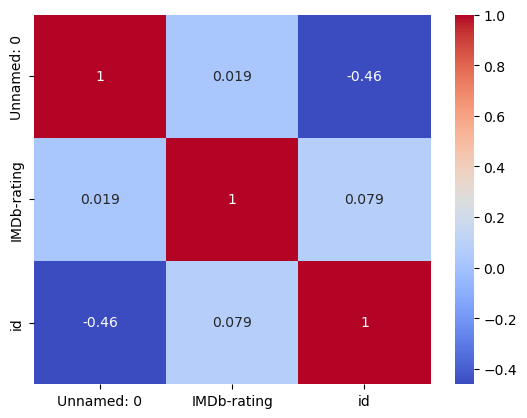

In [5]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = merged_df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

What factors influence the number of downloads (Also meaning mostly pirated) a movie receives? How much of an impact does the industry, language, or release date have on the number of downloads?

**calculate the mean downloads for each language, industry and release year**

---



In [6]:
merged_data = merged_df

# clean up the downloads column
merged_data['downloads'] = merged_data['downloads'].str.replace(',', '').astype(float)

# calculate the mean downloads for each language
language_downloads = merged_data.groupby('language')['downloads'].mean()

# calculate the mean downloads for each industry
industry_downloads = merged_data.groupby('industry')['downloads'].mean()

# calculate the mean downloads for each release year
merged_data['release_date'] = pd.to_datetime(merged_data['release_date'])
year_downloads = merged_data.groupby(merged_data['release_date'].dt.year)['downloads'].mean()

**Plot the result for Q1**

---



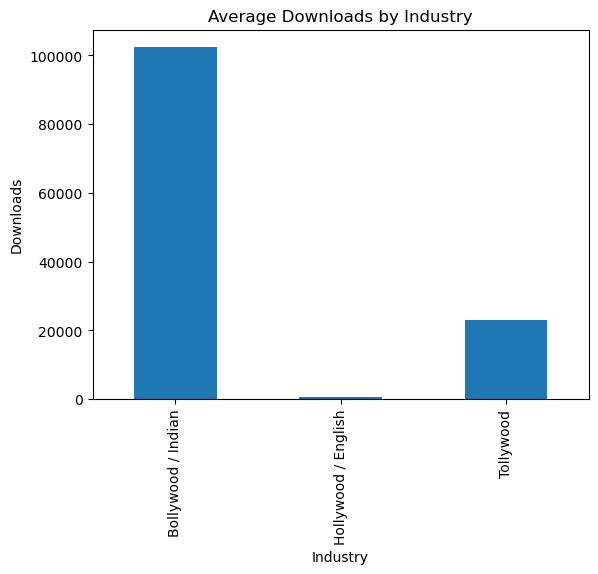

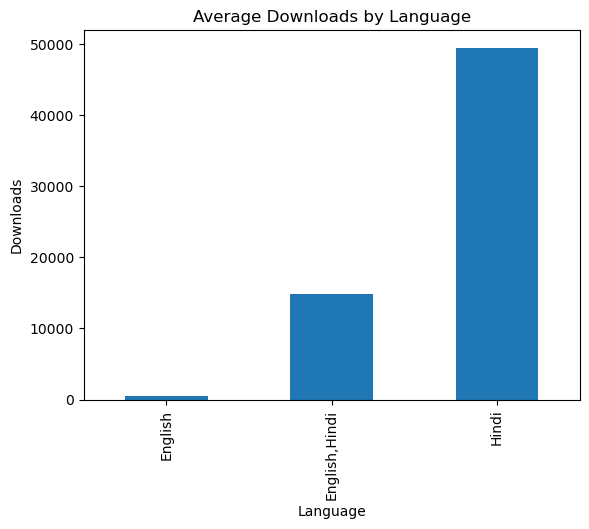

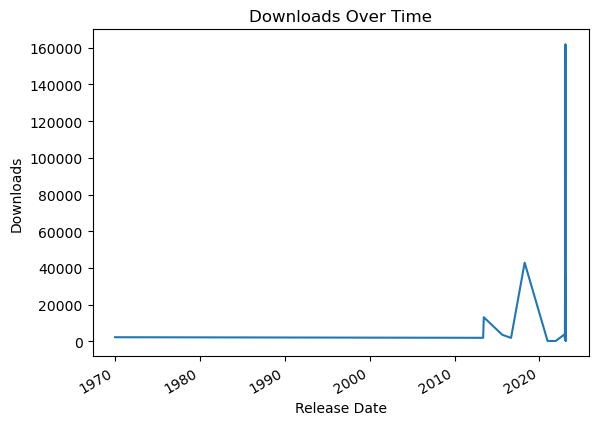

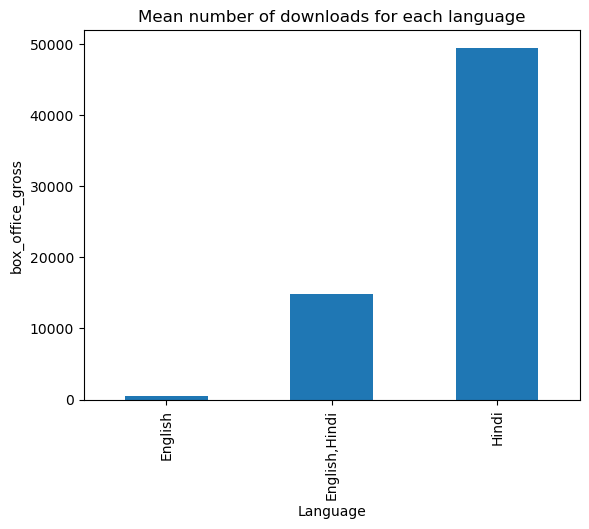

In [7]:
import matplotlib.pyplot as plt

# Plot a bar chart of the number of downloads by industry
merged_df.groupby('industry')['downloads'].mean().plot(kind='bar')
plt.title('Average Downloads by Industry')
plt.xlabel('Industry')
plt.ylabel('Downloads')
plt.show()

# Plot a bar chart of the number of downloads by language
merged_df.groupby('language')['downloads'].mean().plot(kind='bar')
plt.title('Average Downloads by Language')
plt.xlabel('Language')
plt.ylabel('Downloads')
plt.show()

# Plot a line chart of the number of downloads over time
merged_df.groupby('release_date')['downloads'].mean().plot(kind='line')
plt.title('Downloads Over Time')
plt.xlabel('Release Date')
plt.ylabel('Downloads')
plt.show()

merged_df.groupby('language')['downloads'].mean().plot(kind='bar')
plt.title('Mean number of downloads for each language')
plt.xlabel('Language')
plt.ylabel('box_office_gross')
plt.show()

# 2) Does the IMDb rate of any movie affect the download number of the movie? What is the highest pirated movie together and from each industry?

---



Lets check first with the box office report 

# group the data by industry and find the highest pirated movie in each industry
highest_pirated_movies = merged_df.groupby('industry').apply(lambda x: x.loc[x['downloads'].idxmax()])

# sort the movies by IMDb rating and display the top 3
highest_pirated_movies_sorted = highest_pirated_movies.sort_values(by='IMDb-rating', ascending=False)
top_3_movies = highest_pirated_movies_sorted.head(3)

# print the top 3 movies
print('Top 3 highest pirated movies:')
for index, row in top_3_movies.iterrows():
    print(f"{row['title']} ({row['industry']}) - IMDb rating: {row['IMDb-rating']}, downloads: {row['downloads']}, box office: {row['box_office_gross']}")
    
    Top 3 highest pirated movies:
Pathaan (Bollywood / Indian) - IMDb rating: 7.0, downloads: 161862.0, box office: $17,487,476
Thunivu (Tollywood) - IMDb rating: 6.7, downloads: 37593.0, box office: -
Ant-Man and the Wasp: Quantumania (Hollywood / English) - IMDb rating: 6.6, downloads: 14867.0, box office: $212,922,573

In the output above we can see that, there are some movies in the box off data that are not included which is why the Tollywood movie Thunivu does not have a box office sales data. Even if we fill the empty value with null/0 the analysis we will make will not be accurate so it will be better for the analysis to only use the movie dataset rather than incorporating the box-office data. 

In [8]:
# group the data by industry and find the highest pirated movie in each industry
highest_pirated_movies = merged_df.groupby('industry').apply(lambda x: x.loc[x['downloads'].idxmax()])

# sort the movies by IMDb rating and display the top 3
highest_pirated_movies_sorted = highest_pirated_movies.sort_values(by='IMDb-rating', ascending=False)
top_3_movies = highest_pirated_movies_sorted.head(3)

# print the top 3 movies
print('Top 3 highest pirated movies:')
for index, row in top_3_movies.iterrows():
    print(f"{row['title']} ({row['industry']}) - IMDb rating: {row['IMDb-rating']}, downloads: {row['downloads']}")

Top 3 highest pirated movies:
Pathaan (Bollywood / Indian) - IMDb rating: 7.0, downloads: 161862.0
Thunivu (Tollywood) - IMDb rating: 6.7, downloads: 37593.0
Ant-Man and the Wasp: Quantumania (Hollywood / English) - IMDb rating: 6.6, downloads: 14867.0


# 3) Which industry is mostly affected by piracy? 

---



In [9]:
# Group the movies by industry and calculate the total number of downloads for each industry
industry_downloads = merged_df.groupby("industry")["downloads"].sum()

# Sort the industries by the total number of downloads in descending order
industry_downloads = industry_downloads.sort_values(ascending=False)

# Print the industry with the highest total number of downloads
print("The industry with the highest total number of downloads is:", industry_downloads.index[0])

The industry with the highest total number of downloads is: Bollywood / Indian


In [10]:
count_of_missing_values=data.isna().sum()  
pd.DataFrame(data.isna().sum())    

,0
Unnamed: 0,0
IMDb-rating,841
appropriate_for,9476
director,1938
downloads,1
id,0
industry,1
language,542
posted_date,1
release_date,1


**Percentage of Missing Values :**


---



The np.product(data.shape) calculates the total number of values in the dataset by multiplying the number of rows with the number of columns.

The count_of_missing_values.sum() calculates the total number of missing values in the dataset.

The miss_p = (numerator/total_values)*100 calculates the percentage of missing values by dividing the total number of missing values by the total number of values in the dataset and multiplying by 100.

Finally, the code prints the calculated percentage of missing values.

In [11]:
total_values = np.product(data.shape)
numerator = count_of_missing_values.sum()
miss_p  = (numerator/ total_values)*100
print(" The percentage of missing values from the dataset is :", miss_p)

 The percentage of missing values from the dataset is : 5.990526247485562


# Data Cleaning and Preperation



In [12]:

data['appropriate_for']=data['appropriate_for'].fillna('Unrated')

data['appropriate_for'] =data['appropriate_for'].replace('Not Rated', 'Unrated')

data['views']=data['views'].fillna('0')
data['views'].isnull().sum()
data['views'] = data['views'].apply(lambda x:(x.replace(',', ''))).astype(int)



In [13]:
data['title'].value_counts()


The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: title, Length: 16572, dtype: int64

**Identifying Duplicates**

---



In [14]:
counts = data['title'].value_counts()
counts = counts[counts>76]

duplicate_titles=counts.index.tolist()
duplicate_titles

['The Girl Who Escaped: The Kara Robinson Story',
 'Vaathi',
 'Who Invited Charlie?',
 'Little Dixie',
 'The Inspection',
 'WWE Smackdown 2023-02-10',
 'Consent',
 'Vacation Home Nightmare',
 'Your Place or Mine',
 'Baby Ruby',
 'Carnifex',
 'Marlowe',
 'Shehzada',
 'TNA.Impact 2023-02-09',
 'WWE Raw 2023-02-13']

The code above is finding the titles of movies that appear more than 76 times in the dataset.

data['title'].value_counts() returns a count of how many times each unique movie title appears in the 'title' column of the DataFrame.

counts[counts>76] filters the above count to only include movies that have appeared more than 76 times.

counts.index.tolist() returns a list of the movie titles that satisfy the above condition, which are considered to be duplicate titles.

**Fixing the duplicates**

---



In [15]:
import math
def fix_duplicates(df,x):
    y = 0
    temp= []

    y=math.ceil(np.mean(x[x['title']==df]['views']))
    temp=x[x['title']==df].iloc[0]
    print(temp)

    x= x.drop(x[x['title']==df].index)

    x = x.append(temp,ignore_index = True)
    x.loc[x['title'] == df, 'views'] = y
    return x


**The above code explanation :**

Calculates the mean of the 'views' column for all the rows in x that have the same 'title' as the input df.

Selects the first row from x that has the same 'title' as the input df and stores it in a temporary variable called temp.

Removes all the rows from x that have the same 'title' as the input df.

Appends the row stored in temp back to x.

Sets the value of 'views' to the mean calculated in step 1 for the row that has the same 'title' as the input df.

Returns the updated x.

**Fixing all the titles in the duplicate_titles**

---



In [16]:
for i in duplicate_titles:
    data = fix_duplicates(i,data)

Unnamed: 0                                                        28
IMDb-rating                                                      6.6
appropriate_for                                                TV-14
director                                                Simone Stock
downloads                                                        760
id                                                            371877
industry                                         Hollywood / English
language                                                     English
posted_date                                             15 Feb, 2023
release_date                                             Feb 11 2023
run_time                                                          88
storyline          It follows Kara Robinson as she survives an ab...
title                  The Girl Who Escaped: The Kara Robinson Story
views                                                           7430
writer                            

Unnamed: 0                                                        19
IMDb-rating                                                      4.7
appropriate_for                                              Unrated
director                                                 Sean Lahiff
downloads                                                      1,453
id                                                            371943
industry                                         Hollywood / English
language                                                     English
posted_date                                             16 Feb, 2023
release_date                                             Dec 01 2022
run_time                                                          93
storyline          An\r\n aspiring documentarian and two conserva...
title                                                       Carnifex
views                                                          11626
writer                            

/var/folders/vq/h6yb9gbx0_q_t9qm5bq2jc3h0000gp/T/ipykernel_57546/2782485381.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
/var/folders/vq/h6yb9gbx0_q_t9qm5bq2jc3h0000gp/T/ipykernel_57546/2782485381.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
/var/folders/vq/h6yb9gbx0_q_t9qm5bq2jc3h0000gp/T/ipykernel_57546/2782485381.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
/var/folders/vq/h6yb9gbx0_q_t9qm5bq2jc3h0000gp/T/ipykernel_57546/2782485381.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.appen

**Printing the data after fixing the duplicates**

---



In [17]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002,John Christian Plummer
1,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419,Ben Wheatley
2,4,4.6,Unrated,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438,Rajesh Jayaraman
3,5,5.4,Unrated,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940,"Srinivas Gavireddy, Mayukh Adithya"
4,6,NaN,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,Unrated,Sean Lahiff,"1,453",371943,Hollywood / English,English,"16 Feb, 2023",Dec 01 2022,93,An\r\n aspiring documentarian and two conserva...,Carnifex,11756,Shanti Gudgeon
17182,29,6.1,R,Neil Jordan,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,"In late 1930's Bay City, a brooding, down on h...",Marlowe,3149,"William Monahan, John Banville, Raymond Chandler"
17183,11,9.0,Unrated,Rohit Dhawan,"12,954",372039,Bollywood / Indian,Hindi,"18 Feb, 2023",Feb 17 2023,142,Bantu\r\n is hated by his father Valmiki since...,Shehzada,36237,"Hussain Dalal, Rohit Dhawan, Trivikram Srinivas"
17184,63,NaN,Unrated,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1380,NaN


**Check the Dimension of data**

---



In [18]:
data.shape

(17186, 15)

**Converting String runtime to integer format**

---



In [19]:
import re
def runtime_conversion(runtime):
    if runtime.isdigit():
        return int(runtime)
    else:
        # Define regex to extract numerical values
        hr_pattern = re.compile(r'(\d+)\s*(h|hr|hour)s?')
        min_pattern = re.compile(r'(\d+)\s*(m|min)')

        # Extracting numerical values from the input string
        hrs = 0
        mins = 0
        match = hr_pattern.search(runtime)
        if match:
            hrs = int(match.group(1))
        match = min_pattern.search(runtime)
        if match:
            mins = int(match.group(1))

        # Convert hours to minutes and return the total runtime in minutes
        return hrs * 60 + mins

**Explanation of above code**

This code defines a function called "runtime_conversion" which converts the movie runtime from a string format to an integer format.

If the runtime is already in a digit format, the function directly converts it into an integer and returns it.

If the runtime is not in digit format, it uses regular expressions to extract numerical values from the string input. It searches for patterns of hours and minutes using the "hr_pattern" and "min_pattern" regex patterns, respectively. It extracts the numerical values of hours and minutes from the string using these regex patterns.

It then converts the hours to minutes and adds it to the minutes value to get the total runtime in minutes. Finally, the function returns the total runtime in minutes as an integer value.

**Replaced the NaN values with the average run time of movies**

---



In [20]:
data['run_time'] = data['run_time'].fillna('90')

**Convert all the values of run_time to a standard int format**

---



In [21]:
data['run_time'] = data['run_time'].apply(runtime_conversion)

**dropped industry with null value**

---



In [22]:
data=data.drop(data[data['id']==371111].index, axis=0)

**Dropping the columns director, storyline, writer as we don't require them**

---



In [23]:
data_cleaned = data.drop(['director', 'writer','storyline'], axis=1)

**Convert string dates into datetime objects**

---



In [24]:
from datetime import datetime
def conv_posted_date(v):
    format_1 = '%d %b, %Y'
    date = datetime.strptime(v,format_1)
    return date
def conv_release_date(v):
    format_1 = '%b %d %Y'
    date = datetime.strptime(v,format_1)
    return date

**conv_posted_date:** This function takes a string input of the form "dd mmm, yyyy" (e.g., "22 Mar, 2020") and converts it into a datetime object.

**conv_release_date:** This function takes a string input of the form "mmm dd yyyy" (e.g., "Mar 22 2020") and converts it into a datetime object.

**Applying the above functions in the data_cleaned and then printing it**

---



In [25]:
data_cleaned['posted_date'] = data_cleaned['posted_date'].apply(conv_posted_date)
data_cleaned['release_date'] = data_cleaned['release_date'].apply(conv_release_date)
data_cleaned

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.4,TV-PG,73,372091,Hollywood / English,English,2023-02-20,2023-02-05,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.2,R,"1,427",343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107,In the Earth,14419
2,4,4.6,Unrated,657,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122,Alone,2438
3,5,5.4,Unrated,746,372088,Tollywood,Hindi,2023-02-20,2021-11-26,131,Anubhavinchu Raja,2940
4,6,NaN,TV-PG,"5,332",372059,Wrestling,English,2023-02-19,2023-02-18,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,Unrated,"1,453",371943,Hollywood / English,English,2023-02-16,2022-12-01,93,Carnifex,11756
17182,29,6.1,R,283,371876,Hollywood / English,English,2023-02-15,2023-02-15,110,Marlowe,3149
17183,11,9.0,Unrated,"12,954",372039,Bollywood / Indian,Hindi,2023-02-18,2023-02-17,142,Shehzada,36237
17184,63,NaN,Unrated,309,371669,Wrestling,English,2023-02-10,2023-02-09,90,TNA.Impact 2023-02-09,1380


**Find the mode of the language column**

---



In [26]:
from scipy import stats
t=data_cleaned.mode()['language'][0]
print(t)

English


The above code uses the mode() function from the scipy.stats library to find the mode value. 

In [27]:
data_cleaned['language']=data_cleaned['language'].fillna('English')

This code fills the missing values in the 'language' column of the 'data_cleaned' DataFrame with the value 'English'.

**Print the data after the modifications**

---



In [28]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002,John Christian Plummer
1,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107,As the world searches for a cure to a disastro...,In the Earth,14419,Ben Wheatley
2,4,4.6,Unrated,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438,Rajesh Jayaraman
3,5,5.4,Unrated,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940,"Srinivas Gavireddy, Mayukh Adithya"
4,6,NaN,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,Unrated,Sean Lahiff,"1,453",371943,Hollywood / English,English,"16 Feb, 2023",Dec 01 2022,93,An\r\n aspiring documentarian and two conserva...,Carnifex,11756,Shanti Gudgeon
17182,29,6.1,R,Neil Jordan,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,"In late 1930's Bay City, a brooding, down on h...",Marlowe,3149,"William Monahan, John Banville, Raymond Chandler"
17183,11,9.0,Unrated,Rohit Dhawan,"12,954",372039,Bollywood / Indian,Hindi,"18 Feb, 2023",Feb 17 2023,142,Bantu\r\n is hated by his father Valmiki since...,Shehzada,36237,"Hussain Dalal, Rohit Dhawan, Trivikram Srinivas"
17184,63,NaN,Unrated,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,90,NaN,TNA.Impact 2023-02-09,1380,NaN


**Count missing values in data_cleaned after modifying data**

---



In [29]:
count_of_missing_values=data_cleaned.isna().sum()  
pd.DataFrame(data_cleaned.isna().sum())  

,0
Unnamed: 0,0
IMDb-rating,486
appropriate_for,0
downloads,0
id,0
industry,0
language,0
posted_date,0
release_date,0
run_time,0


Result : 
All collumns have 0 missing values except ImDb-rating

# Exploratory Data Analysis

## QUE : 1 What factors influence the number of downloads a movie receives? How much of an impact does the industry, language, or release date have on the number of downloads?

**Print datatypes of the variables in data_cleaned**

---



In [30]:
data_cleaned.dtypes

Unnamed: 0                  int64
IMDb-rating               float64
appropriate_for            object
downloads                  object
id                          int64
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
title                      object
views                       int64
dtype: object

**Converting the downloads column in the 'data_cleaned' dataframe from a string type to a numeric type.**

---



In [31]:
data_status = data_cleaned.copy()
data_status['downloads'] = data_status['downloads'].str.replace(',','')

data_status["downloads"] = pd.to_numeric(data_status["downloads"])

data_status.dtypes

Unnamed: 0                  int64
IMDb-rating               float64
appropriate_for            object
downloads                   int64
id                          int64
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
title                      object
views                       int64
dtype: object

In [32]:
data_status['industry']=data_status['industry'].astype('category').cat.codes
data_status['language']=data_status['language'].astype('category').cat.codes
data_status['appropriate_for']=data_status['appropriate_for'].astype('category').cat.codes


In the code above, categorical columns "industry", "language" and "appropriate_for" are encoded using the .cat.codes method of pandas' Categorical data type. This method assigns a unique integer code to each category in a column.

In [33]:
data_status.release_date=pd.to_datetime(data_status.release_date)
data_status.release_date=pd.to_numeric(data_status.release_date)


Converting the release_date column to numeric using pd.to_numeric() function after first converting it to a datetime object with pd.to_datetime()

In [34]:
lindata = data_status.copy()
corr_data = lindata.corr()['downloads'].sort_values()
corr_data

id                -0.191444
industry          -0.124834
appropriate_for   -0.042403
release_date      -0.000706
IMDb-rating        0.133105
Unnamed: 0         0.165327
language           0.304343
run_time           0.369027
views              0.946408
downloads          1.000000
Name: downloads, dtype: float64

The above code calculates the correlation coefficient between the "downloads" column and every other column in the "lindata" dataset. The resulting correlation values are then sorted in ascending order and stored in the "corr_data" variable.

**Creating a scatter plot with 'downloads' on the y-axis and each variable in the group on the x-axis.**

---



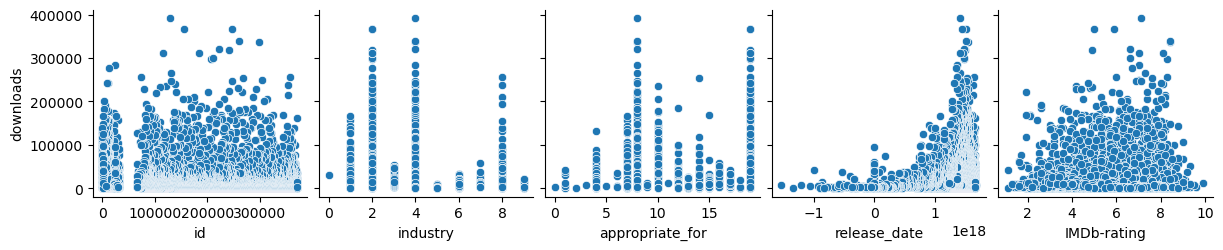

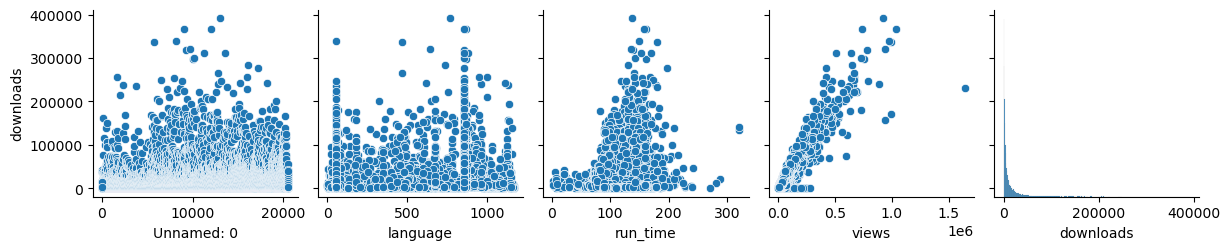

In [35]:
import seaborn as sns

for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=lindata,
                x_vars = corr_data.index[i : i + 5],
                y_vars = ['downloads'])

We observe that Rumtime, Views, Language and IMDb-rating have +ve correlation and industry, appropriate for, release-date variables have -ve correlation with Downloads.

Also, the variables views, runtime and language have the highest correlation values which implies that these variables highly affects the number of downloads, whereas variables like release_date and appropriate_for have lowest correlation values which implies they have very less impact on the number of downloads.  

## KNN Regression to find missing values of IMDB Ratings

**Diving Data according to wheather the IMDB ratings are known or not**

---



In [36]:
X_predict=data_status[data_status['IMDb-rating'].isna()]
y_predict=X_predict['IMDb-rating']
X1=data_status[data_status[['IMDb-rating']].notnull().all(1)]
y=X1['IMDb-rating']


**Importing Important libraries and finding missing values of IMDB Ratings using KNN**

---



In [37]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


X=X1.loc[:,['downloads','run_time','language','views']]


from sklearn import preprocessing
from sklearn import utils





# Instance and fit
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=90).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
print(score_knn)




0.05597537695695898


In the above code we are trying to build a K-Nearest Neighbors regression model to predict the downloads variable in our dataset based on other features such as run_time, language, and views.

First, extracted the required features from your dataset and stored them in the X variable.

Then, split the dataset into training and testing sets using the train_test_split() method from sklearn.model_selection.

After that, we instantiated a KNN regression model with n_neighbors=90 and fitted it to the training data using the KNeighborsRegressor() class from sklearn.neighbors.

Finally, we calculated the accuracy score of your model using the score() method of the KNN model object, passing in the testing data and labels.
which is 0.05597537695695898

**Predictions using the above KNN model**

---



In [38]:
X_predict2=X_predict.loc[:,['downloads','run_time','language','views']]

y_predict = knn_model.predict(X_predict2)

**Drop the IMDB-rating Column**

---



In [39]:
X_predict.drop(['IMDb-rating'],axis=1,inplace=True)

/var/folders/vq/h6yb9gbx0_q_t9qm5bq2jc3h0000gp/T/ipykernel_57546/3953033675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict.drop(['IMDb-rating'],axis=1,inplace=True)


**Print the predictions**

---



In [40]:
X_predict

,Unnamed: 0,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
4,6,15,5332,372059,9,54,2023-02-19,1676678400000000000,200,WWE Elimination Chamber,11978
9,12,19,2253,372038,9,54,2023-02-18,1676592000000000000,90,WWE Smackdown 2023-02-17,5468
12,16,19,2785,371990,6,1074,2023-02-17,1676505600000000000,90,Sab Fadey Jaange.2023,12968
14,18,19,171,371988,9,54,2023-02-17,1676505600000000000,90,TNA.Impact 2023-02-16,667
18,24,19,1299,371932,2,854,2023-02-16,1674259200000000000,142,Ho Ja Mukt,10891
...,...,...,...,...,...,...,...,...,...,...,...
17155,20528,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6218
17168,20543,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6219
17176,55,19,1781,371740,9,54,2023-02-13,1675987200000000000,90,WWE Smackdown 2023-02-10,4842
17184,63,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380


In [41]:
X_predict['IMDb-rating']=y_predict

/var/folders/vq/h6yb9gbx0_q_t9qm5bq2jc3h0000gp/T/ipykernel_57546/2318414048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict['IMDb-rating']=y_predict


In [42]:
X_predict

,Unnamed: 0,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views,IMDb-rating
4,6,15,5332,372059,9,54,2023-02-19,1676678400000000000,200,WWE Elimination Chamber,11978,5.266667
9,12,19,2253,372038,9,54,2023-02-18,1676592000000000000,90,WWE Smackdown 2023-02-17,5468,6.017778
12,16,19,2785,371990,6,1074,2023-02-17,1676505600000000000,90,Sab Fadey Jaange.2023,12968,5.705556
14,18,19,171,371988,9,54,2023-02-17,1676505600000000000,90,TNA.Impact 2023-02-16,667,5.415556
18,24,19,1299,371932,2,854,2023-02-16,1674259200000000000,142,Ho Ja Mukt,10891,5.548889
...,...,...,...,...,...,...,...,...,...,...,...,...
17155,20528,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6218,6.292222
17168,20543,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6219,6.292222
17176,55,19,1781,371740,9,54,2023-02-13,1675987200000000000,90,WWE Smackdown 2023-02-10,4842,6.081111
17184,63,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380,5.410000


In [43]:
data_cleaned=pd.concat([X1,X_predict])

In this code, X1 and X_predict are being concatenated vertically along axis 0 to form a new DataFrame called data_cleaned.

This operation results in a new DataFrame that contains all the rows from X1 and X_predict combined. This is done in order to perform any necessary cleaning, preprocessing or feature engineering on the entire dataset.

**Print the new cleaned data : data_cleaned**

---



In [44]:
data_cleaned

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.400000,15,73,372091,4,54,2023-02-20,1675555200000000000,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.200000,10,1427,343381,4,351,2021-04-20,1623974400000000000,107,In the Earth,14419
2,4,4.600000,19,657,372089,8,854,2023-02-20,1674691200000000000,122,Alone,2438
3,5,5.400000,19,746,372088,8,854,2023-02-20,1637884800000000000,131,Anubhavinchu Raja,2940
5,7,6.500000,10,1781,371751,4,54,2023-02-13,1676592000000000000,116,Sharper,18225
...,...,...,...,...,...,...,...,...,...,...,...,...
17155,20528,6.292222,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6218
17168,20543,6.292222,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6219
17176,55,6.081111,19,1781,371740,9,54,2023-02-13,1675987200000000000,90,WWE Smackdown 2023-02-10,4842
17184,63,5.410000,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380


##What is the highest pirated movie together and from each industry? 

In [45]:
vd =data_cleaned[['title','views', 'industry']].sort_values(by='views', ascending=False)
vd

,title,views,industry
6993,Baaghi 2,1638533,2
7400,Tiger Zinda Hai,1038317,2
6585,Raid,993825,2
4666,Avengers: Endgame,991133,4
6643,Avengers: Infinity War,969673,4
...,...,...,...
358,TNA.Impact 2022-12-08,888,9
548,TNA.Impact 2022-11-03,873,9
502,TNA.Impact 2022-11-10,852,9
2749,Free Byrd,698,4


**Explanation of above code**

This code is sorting a DataFrame called data_cleaned by the columns views and industry in descending order.
This allows us to see which entries in data_cleaned have the most views, sorted by industry.

**A bar plot showing the top 20 pirated movies with the highest views, sorted by industry.**

---



Text(0.5, 1.0, 'Highest viewed pirated Movies by Industry')

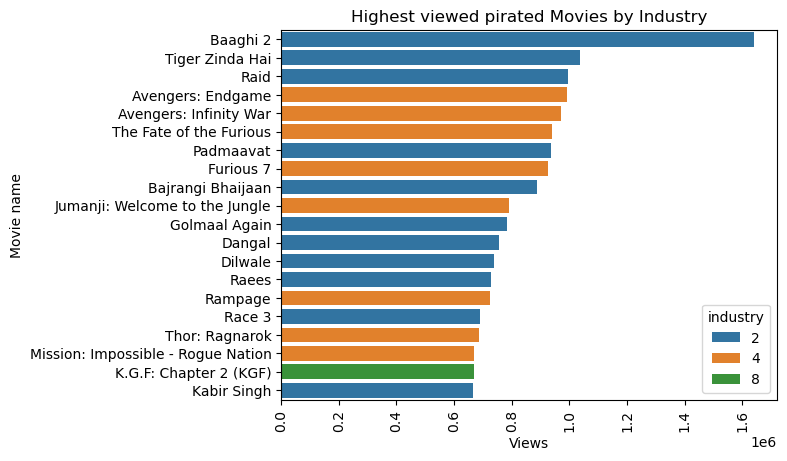

In [46]:
import seaborn as sns

sns.barplot(data=vd[0:20], y='title', x='views', hue = 'industry', orient='h', dodge=False)
plt.ylabel('Movie name')
plt.xlabel('Views')
plt.xticks(rotation=90)
plt.title('Highest viewed pirated Movies by Industry')

##Which industry is mostly affected by piracy?

In [47]:
import matplotlib.pyplot as plt
x=[]
industry_rate=data_cleaned['industry'].value_counts().values
industry_name = data_cleaned['industry'].value_counts().index
for i in industry_rate:
    x.append((0.5)*i + 0.5*1700)

This code creates a pie chart showing the relative proportion of movies from each industry that are affected by piracy.

First, it calculates the total number of movies for each industry from the data_cleaned DataFrame. Then, it calculates a normalized value for each industry by taking half the number of movies in that industry and adding it to a fixed constant value of 1700. The constant value is used to ensure that the smallest industry still has a non-zero normalized value.

Finally, the plt.pie function is used to create a pie chart with the normalized values for each industry as the input data. The industry names are used as labels for each slice of the pie chart. The rotation argument is used to rotate the labels along the x-axis to prevent overlapping. The title of the chart is "Industry affected by Piracy (Normalized Values)."

**Generate a pie chart showing the percentage of movies affected by piracy in each industry**

---



Text(0.5, 1.0, 'Industry affected by Piracy ( Normalized Values)')

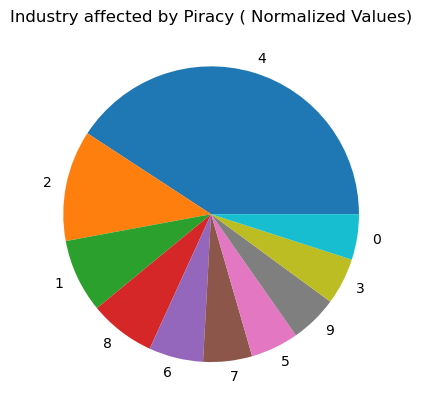

In [48]:
fig, ax = plt.subplots()

# ax.bar(industry_name, x)
plt.pie(x, labels = industry_name)

plt.xticks(rotation=80)

plt.title('Industry affected by Piracy ( Normalized Values)')


We can obsereve that Hollywood/English Industry is the most affected by Piracy followed by Bollywood/Indian Industry.

# Machine Learning Model

**Importing Libraries**

---



In [49]:
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.linear_model import LinearRegression

mean_squared_error function computes mean squared error regression loss between actual and predicted values.

r2_score function computes the coefficient of determination which is used to evaluate the quality of the regression model.

LinearRegression is a class used for performing linear regression analysis in Scikit-learn. It fits a linear model to the given data and makes predictions based on that.

**Printing the preprocessed data**

---



In [50]:
data_status

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.4,15,73,372091,4,54,2023-02-20,1675555200000000000,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.2,10,1427,343381,4,351,2021-04-20,1623974400000000000,107,In the Earth,14419
2,4,4.6,19,657,372089,8,854,2023-02-20,1674691200000000000,122,Alone,2438
3,5,5.4,19,746,372088,8,854,2023-02-20,1637884800000000000,131,Anubhavinchu Raja,2940
4,6,NaN,15,5332,372059,9,54,2023-02-19,1676678400000000000,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,19,1453,371943,4,54,2023-02-16,1669852800000000000,93,Carnifex,11756
17182,29,6.1,10,283,371876,4,54,2023-02-15,1676419200000000000,110,Marlowe,3149
17183,11,9.0,19,12954,372039,2,854,2023-02-18,1676592000000000000,142,Shehzada,36237
17184,63,NaN,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380


###Linear Regression
Predicting the number of views based on the number of downloads.





In [51]:
linear_reg = LinearRegression()
x =data_cleaned['downloads'].values.reshape(-1,1)
y = data_cleaned['views']        

linear_reg.fit(x,y)

LinearRegression()

In the above code we are fitting a simple linear regression model using the LinearRegression class from scikit-learn library. The feature 'downloads' is taken as the independent variable(x) and the target variable is 'views'. We reshape the 'downloads' feature to a 2D array with a single column using the 'reshape' method. Then we fit the linear regression model using the 'fit' method with the feature 'downloads' and the target variable 'views'. The trained model will be stored in the 'linear_reg' object.

**Visualising and Calculating Evaluation matrix fro linear regression**

---



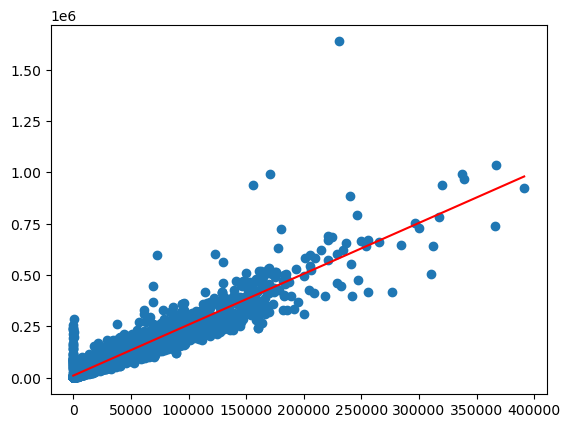

Mean Absolute Error:  299537.8040039907
Mean Squared Error:  117709157823.73242
Root Mean Squared Error:  343087.6824133044


In [52]:
# Creating an array with minimum and maximum values of downloads column to be used for x-axis in the scatterplot
x_array = np.arange(min(data_status['downloads']),max(data_status['downloads'])).reshape(-1,1)  # this for information about the line to be predicted

# Creating a scatterplot of downloads vs Views
plt.scatter(x,y)

# Predicting y-values for the range of x-values created above and plotting the linear regression line
y_head = linear_reg.predict(x_array)                               
plt.plot(x_array,y_head,color="red")

# Displaying the scatterplot and the regression line
plt.show()

# Calculating and printing the evaluation metrics of the linear regression model
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

**Calculating r2_score and Print it**

---



In [53]:
print(r2_score(y, linear_reg.predict(x)))

0.8956888826617468


The r2_score function calculates how well the linear regression model fits the data. It gives a value between 0 and 1, where 1 means that the model perfectly predicts the outcome, and 0 means that the model doesn't explain any of the variation in the data.

In the given code, r2_score(y, linear_reg.predict(x)) is calculating the coefficient of determination for the linear regression model where x is the independent variable (downloads) and y is the dependent variable (views). The predict function is used to predict the views using the linear regression model. The output of the r2_score function is printed to the console.

###Multi Linear Regression
Predicting the number of views based on several variables like number of downloads, run_time, language and IMDb-rating of a movie.





In [54]:
multidata_x=data_cleaned.loc[:,['downloads','run_time','language','IMDb-rating']]
y=data_cleaned['views']
multidata_x.head()

,downloads,run_time,language,IMDb-rating
0,73,84,54,6.4
1,1427,107,351,5.2
2,657,122,854,4.6
3,746,131,854,5.4
5,1781,116,54,6.5


**Fit the multidata_x and y with linear regression**

---



In [55]:
model=linear_reg.fit(multidata_x,y)

**find errors**

---



In [56]:
rmse=np.sqrt(mean_squared_error(y,model.predict(multidata_x)))
rmse

21533.476529727064

**Check the model Score**

---



In [57]:
model.score(multidata_x,y)

0.8964162725828869

#Decision Tree Regression
Predicting the number of views based on the number of downloads of the movie.


In [58]:
from sklearn.tree import DecisionTreeRegressor   # import the DecisionTreeRegressor model
from sklearn.model_selection import train_test_split   # import the train_test_split function

# prepare the data
x = data_status['downloads'].values.reshape(-1,1)
y = data_status['views'].values.reshape(-1,1)

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In the above code imports the DecisionTreeRegressor model from the sklearn.tree module and the train_test_split function from the sklearn.model_selection module. It then prepares the data by extracting the downloads and views columns from the data_status DataFrame and reshaping them into NumPy arrays. Finally, it splits the data into training and testing sets using the train_test_split function, with 20% of the data allocated to the test set and a random state of 42 for reproducibility.

**fitting the final model according to train values**

---



In [59]:
DT_reg = DecisionTreeRegressor()           # Decision Tree model
DT_reg.fit(x_train,y_train)                # fitting the final model according to train values

DecisionTreeRegressor()

**Visualize the results using a scatter plot and a predicted line.**

---



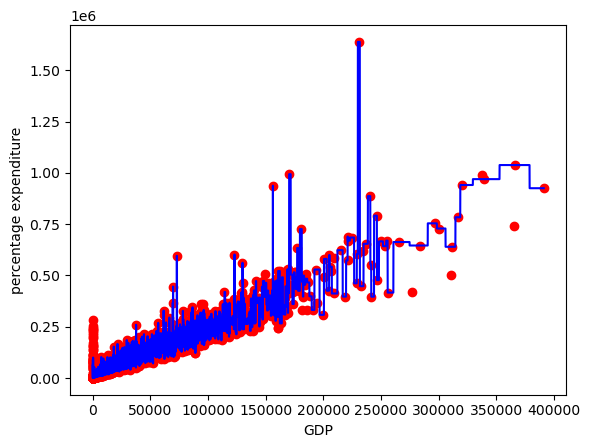

In [60]:
# Generate x values to be used for drawing the predicted line
# The values start from the minimum x value and end at the maximum x value with a step size of 0.01
# The resulting array is reshaped to a 2D array with one column using reshape(-1,1)
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)

# Use the DecisionTreeRegressor model to predict y values for each x value in x_array
y_head = DT_reg.predict(x_array)

# Create a scatter plot with red dots to represent the actual data points
plt.scatter(x,y, color="red")

# Create a blue line plot to represent the predicted values based on the DecisionTreeRegressor model
plt.plot(x_array,y_head,color="blue")

# Label the x-axis as "GDP"
plt.xlabel("GDP")

# Label the y-axis as "percentage expenditure"
plt.ylabel("percentage expenditure")

# Show the plot
plt.show()

We can see in the above plot Red points which were original points and blue lines are what our model predicts,our model is able to predict good results.